In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [3]:
def state_space(vel):
    xdot = vel
    lr = 1.39
    lf = 1.55
    Ca = 20000
    Iz = 25854
    m = 1888.6

    A = np.zeros((4, 4))
    A[0, 1] = 1
    A[2, 3] = 1
    A[1, 1] = -(4 * Ca) / (m * xdot)
    A[1, 2] = (4 * Ca) / m
    A[1, 3] = -(2 * Ca * (lf - lr)) / (m * xdot)
    A[3, 1] = -(2 * Ca * (lf - lr)) / (Iz * xdot)
    A[3, 2] = (2 * Ca * (lf - lr)) / Iz
    A[3, 3] = -(2 * Ca * (np.power(lf, 2) + np.power(lr, 2))) / (Iz * xdot)

    B = np.zeros((4, 2))
    B[1, 0] = (2 * Ca) / m
    B[3, 0] = (2 * Ca * lf) / Iz

    C = np.zeros((2, 4))
    C[0, 0] = 1
    C[1, 2] = 1
    D = np.zeros((2, 2))

    return A, B, C, D
    
def controllability (A, B):
    m, n = A.shape
    mb, nb = B.shape
    assert m == n, "A is not a square matrix!"
    assert n == mb, "Dimensions don't match!"

    prod = B.copy()
    co = prod
    for _ in range(n - 1):
        prod = A @ prod
        co = np.concatenate((co, prod), axis = 1)
    
    return co, np.linalg.matrix_rank(co)

def observability (A, C):
    m, n = A.shape
    mb, nb = C.shape
    assert m == n, "A is not a square matrix!"
    assert nb == m, "Dimensions don't match!"

    prod = C.copy()
    ob = prod
    for _ in range(n - 1):
        prod = prod @ A
        ob = np.concatenate((ob, prod), axis = 0)
    
    return ob, np.linalg.matrix_rank(ob)

In [4]:
for xdot in [2, 5, 8]:
    A, B, C, D = state_space(xdot)

    ctrb, c = controllability(A, B)
    obsv, o = observability(A, C)

    if c == A.shape[0] and o == A.shape[0]:
        print(f"For xdot = {xdot} m/s : Controllable and Observable.")
    elif c == A.shape[0]:
        print(f"For xdot = {xdot} m/s : Controllable, but not Observable.")
    elif o == A.shape[0]:
        print(f"For xdot = {xdot} m/s : Observable, but not Controllable.")
    else:
        print(f"For xdot = {xdot} m/s : Neither Controllable, nor Observable.")

For xdot = 2 m/s : Controllable and Observable.
For xdot = 5 m/s : Controllable and Observable.
For xdot = 8 m/s : Controllable and Observable.


Text(0.5, 1.0, '$\\log10(\\frac{\\sigma_n} {\\sigma_1})$ $vs.$ $v$')

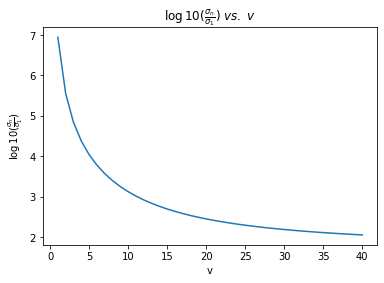

In [5]:
velocities = np.arange(1, 41)
logs = np.zeros(velocities.shape)

for i in range(len(velocities)):
    A, B, _, _ = state_space(velocities[i])
    P, _ = controllability(A, B)
    _, sigma, _ = np.linalg.svd(P)
    logs[i] =np.log10(sigma[0] / sigma[-1])

plt.plot(velocities, logs)
plt.xlabel("v")
plt.ylabel(r"$\log10(\frac{\sigma_n} {\sigma_1})$")
plt.title(r"$\log10(\frac{\sigma_n} {\sigma_1})$ $vs.$ $v$")

'\nThe system is controllable for all values of \nThe system is unstable till approx v = 33, then the system becomes stable isL\n'

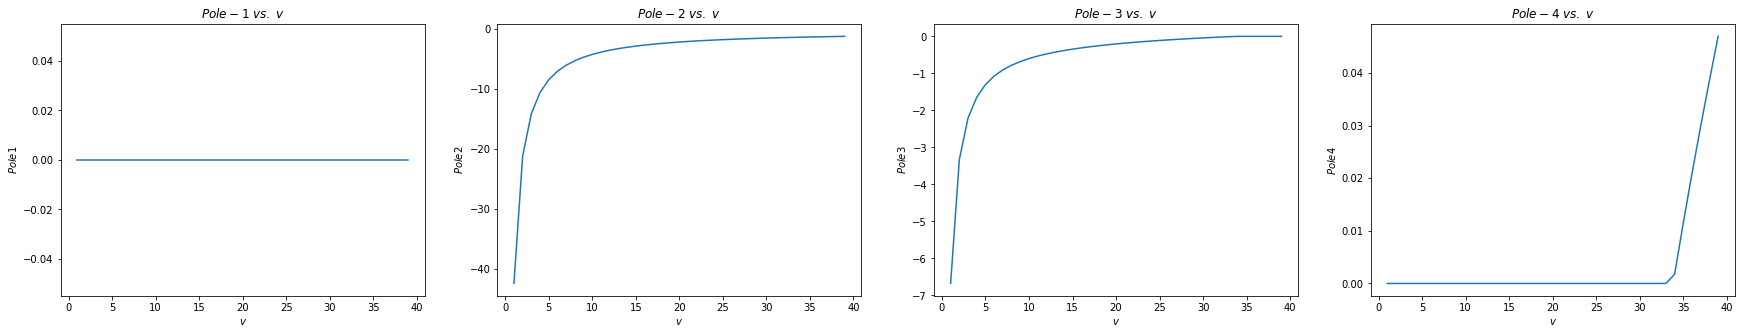

In [6]:
velocities = np.arange(1, 40)
poles = np.zeros((4, len(velocities)))
for i in range(len(velocities)):
    A, _, _, _ = state_space(velocities[i])
    p, _ = np.linalg.eig(A)
    poles[:, i] = np.transpose(p)

real_poles = np.real(poles)
fig, ax = plt.subplots(1, 4, figsize=(30, 5))
for k in range(real_poles.shape[0]):
    ax[k].plot(velocities, real_poles[k,:])
    ax[k].set_xlabel("$v$")
    ax[k].set_ylabel(f"$Pole {k + 1}$")
    ax[k].set_title(f"$Pole-{k + 1}$ $vs.$ $v$")

"""
The system is controllable for all values of 
The system is unstable till approx v = 33, then the system becomes stable isL
"""